# Estacionariedad y retrasos temporales

En este notebook profundizaremos sobre la estacionariedad y los retrasos temporales (o lags). Recordemos que la condición d eestacionariedad será algo que deben cumplir nuestras series temporales antes de utilizar un modelo de autorregresión, ya que en el fondo es un modelo lineal, y la independencia entre variables es una de las condiciones necesarias para que sean correctas las predicciones.

## Estacionariedad

Para poder modelar una serie temporal necesitamos que sea estacionaria, lo que significa que sus estadísticos no cambien con el tiempo. Es decir, que ni la media, ni la varianza, ni la covarianza varíen según nos movamos en el eje temporal.

Veamos en un ejemplo de cómo comprobar si una serie es estacionaria y, en caso contrario, qué tenemos que hacer para convertirla.

Para comenzar, cargaremos los datos que vamos a utilizar, que son datos de la evolución de acciones:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('data/FB.csv', header=0, index_col=0)
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


Representamos la serie:

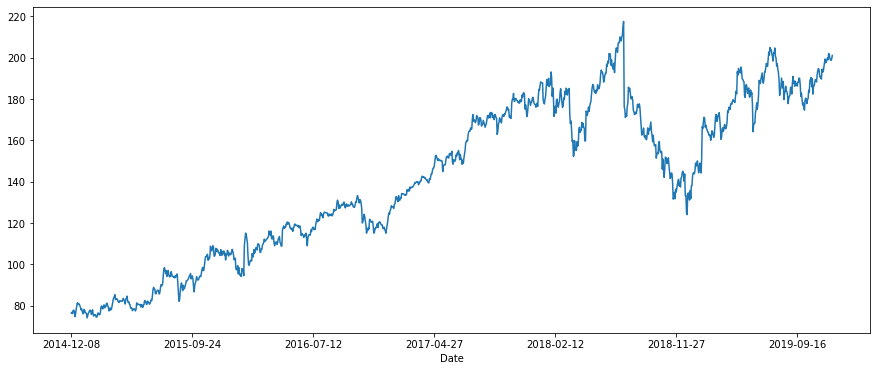

In [2]:
series['Close'].plot(figsize=(15,6));

Como podemos observar, no es estacionaria, ya que presenta una tendencia, y la varianza no se manteiene a lo largo de la serie temporal

Si calculamos sus estadísticos a lo largo de diferentes ventanas, podemos comprobar que, si son diferentes, no es estacionaria:

In [18]:
for i in range(0, 4):
    print(series.iloc[i*(int(len(series)/4)):(i+1)*(int(len(series)/4))]['Close'].describe())

count    314.000000
mean      90.290701
std       11.069608
min       74.050003
25%       80.472501
50%       89.319999
75%       99.637499
max      115.089996
Name: Close, dtype: float64
count    314.000000
mean     126.634236
std       11.669182
min      107.320000
25%      117.597502
50%      124.625000
75%      133.809997
max      153.630005
Name: Close, dtype: float64
count    314.000000
mean     176.281974
std       13.199269
min      148.429993
25%      169.409999
50%      176.110001
75%      183.605004
max      217.500000
Name: Close, dtype: float64
count    314.000000
mean     172.002930
std       19.874711
min      124.059998
25%      158.970005
50%      176.560005
75%      188.422497
max      204.869995
Name: Close, dtype: float64


Como podemos comprobar, los estadísticos cambian bastante, por lo que ya tenemos otra prueba de que no estamos tratando con una serie estacionaria.

Finalmente, vamos a comprobarlo de la tercera forma que hemos visto, que será la forma más precisa: un test de raíz unitaria.

En este caso, el test que vamos a seguir para comprobar si la serie temporal es estacionaria o no, es el test de Dickey-Fuller.

El test de DF plantea la hipótesis nula de que la serie NO es estacionaria. Se trata de comprobar sus p-values, si quedan por encima o por debajo su nivel de significación (0.05):
 *  Si queda por encima de su nivel de significación, aceptamos la hipótesis nula y concluimos que la serie NO es estacionaria.
 *  Si NO queda por encima, rechazaríamos la hipótesis nula en favor de la hipótesis alternativa, con la que concluiremos que la serie es estacionaria.

In [24]:
from statsmodels.tsa.stattools import adfuller

adfuller(series['Close'])[1]

0.6115683442065493

Como queda por encima del nivel de significación (0.61 > 0.05), no es estacionaria.

Para solucionar esto, podemos diferenciar la serie. Normalmente, con una diferenciación de 1 es suficiente. Veamos qué ocurre en este caso:

In [25]:
series2 = series[['Close']].copy()
series2['close_diff_1'] = series2['Close'].diff(1)
series2['close_diff_2'] = series2['Close'].diff(2)
series2.head()

,Close,close_diff_1,close_diff_2
Date,,,
2014-12-08,76.519997,NaN,NaN
2014-12-09,76.839996,0.319999,NaN
2014-12-10,76.180000,-0.659996,-0.339997
2014-12-11,77.730003,1.550003,0.890007
2014-12-12,77.830002,0.099999,1.650002


Representamos la diferenciación de 1:

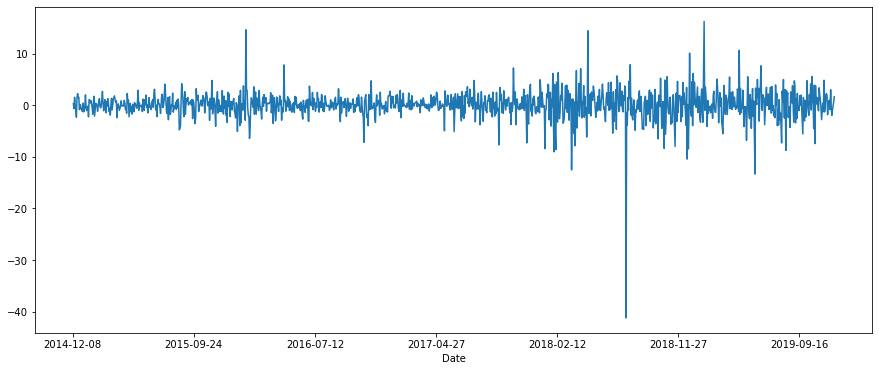

In [26]:
series2['close_diff_1'].plot(figsize=(15,6));

Ahora calculamos sus estadísticos de nuevo:

In [27]:
for i in range(0, 4):
    print(series2.iloc[i*(int(len(series2)/4)):(i+1)*(int(len(series2)/4))]['close_diff_1'].describe())

count    313.000000
mean       0.093962
std        1.798327
min       -6.419998
25%       -0.879997
50%        0.080002
75%        1.059998
max       14.660004
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.149299
std        1.418975
min       -7.169998
25%       -0.570000
50%        0.120003
75%        0.967503
max        7.840004
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.058440
std        3.658343
min      -41.240005
25%       -1.155003
50%        0.245002
75%        1.747501
max       14.470002
Name: close_diff_1, dtype: float64
count    314.000000
mean       0.088089
std        3.206588
min      -13.320007
25%       -1.534997
50%        0.079994
75%        1.965004
max       16.270004
Name: close_diff_1, dtype: float64


Ya que hemos diferenciado, y supuestamente ahora la serie es estacionaria, vamos a volver a probar con el test de Dickey-Fuller

In [28]:
adfuller(series2['close_diff_1'].dropna())[1]

0.0

#### EJERCICIO
Ahora utilizaremos los datos 'Mean_Temp_IMD_2017.csv', dentro de la carpeta 'data'.

1. Lee los datos del csv y quédate con el eje temporal y la columna ``ANNUAL_AVG_TEMPRATURE``
2. Representa estos datos
3. Calcula estadísticamente si es estacionaria o no (con el test)
4. Si no es estacionaria, aplica diferencias para volverla estacionaria y compruébalo con el test correespondiente, y represéntala

## Lag

Un lag es un retraso en el tiempo. Se utiliza este concepto para ver la relación que tiene cada instante de una serie temporal con instantes anteriores.

Se pueden calcular utilizando el método ``shift(n_retrasos)``:

In [30]:
series_tmp = pd.read_csv('data/Mean_Temp_IMD_2017.csv', header=0, index_col=0)

In [32]:
series_tmp['lag1'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(1)
series_tmp['lag2'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(2)
series_tmp['lag3'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(3)
series_tmp['lag4'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(4)
series_tmp['lag5'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(5)
series_tmp.head()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
YEAR,,,,,,
1901,24.23,NaN,NaN,NaN,NaN,NaN
1902,24.33,24.23,NaN,NaN,NaN,NaN
1903,23.80,24.33,24.23,NaN,NaN,NaN
1904,23.86,23.80,24.33,24.23,NaN,NaN
1905,23.71,23.86,23.80,24.33,24.23,NaN


Como los algoritmos de regresión en time series dependen de instantes anteriores, hay que intentar evitar que los lags estén muy autocorrelados, por que si no, sufriremos de multicolinearidad.

Veamos cuánto de correlados están los lags:

In [33]:
series_tmp.corr()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
ANNUAL_AVG_TEMPRATURE,1.000000,0.709562,0.519207,0.559016,0.543152,0.541317
lag1,0.709562,1.000000,0.630760,0.495757,0.558646,0.529761
lag2,0.519207,0.630760,1.000000,0.636485,0.500332,0.560252
lag3,0.559016,0.495757,0.636485,1.000000,0.627644,0.484547
lag4,0.543152,0.558646,0.500332,0.627644,1.000000,0.619090
lag5,0.541317,0.529761,0.560252,0.484547,0.619090,1.000000


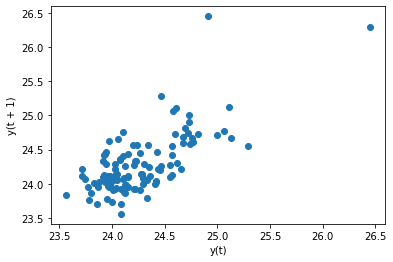

In [34]:
from pandas.plotting import lag_plot

lag_plot(series_tmp['ANNUAL_AVG_TEMPRATURE']);

Como podemos comprobar, se observa cierta correlación entre los lags temporales. Para verlo con mayor detalle, podemos recurrir a la autocorrelación.

## Gráfico de autocorrelación

La representación de la autocorrelación es muy importante, ya que si vamos a utilizar una regresión lineal, no deseamos que los lags estén muy correlacionados unos con otros (condición de independencia de los modelos lineales).

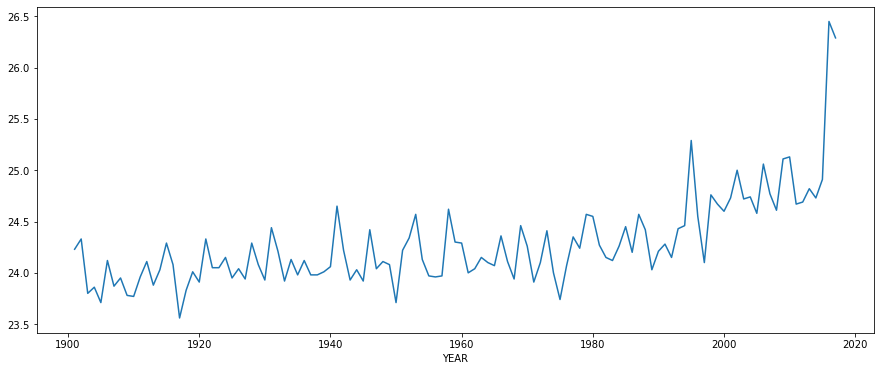

In [38]:
series_tmp['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6));

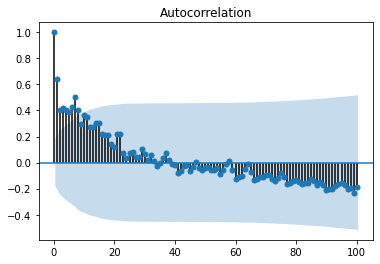

In [40]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(series_tmp['ANNUAL_AVG_TEMPRATURE'], lags=100);

¿Cómo interpretamos esto? Vemos que hay correlación muy alta entre cada dato y sus lags. Esto es debido a que la serie no es estacionaria.

Diferenciando, perdemos esa correlación entre los lags, y conseguimos una serie temporal más adecuada para entrenar nuestros modelos.

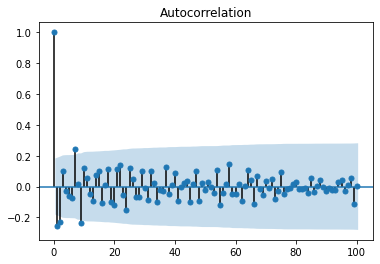

In [41]:
diferencio = series_tmp['ANNUAL_AVG_TEMPRATURE'].diff().dropna()

plot_acf(diferencio, lags=100);

En este gráfico se aprecia que, con la diferenciación, conseguimos que baje mucho la correlación, que es lo que estamos buscando. No obstante, vamos a comprobarlo mediante la tabla de correlaciones:

In [57]:
diferencio2 = pd.DataFrame(diferencio.copy())
diferencio2['lag1'] = diferencio2['ANNUAL_AVG_TEMPRATURE'].shift(1)
diferencio2['lag2'] = diferencio2['ANNUAL_AVG_TEMPRATURE'].shift(2)
diferencio2['lag3'] = diferencio2['ANNUAL_AVG_TEMPRATURE'].shift(3)
diferencio2['lag4'] = diferencio2['ANNUAL_AVG_TEMPRATURE'].shift(4)
diferencio2['lag5'] = diferencio2['ANNUAL_AVG_TEMPRATURE'].shift(5)
diferencio2.corr()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
ANNUAL_AVG_TEMPRATURE,1.000000,-0.254626,-0.258171,0.116523,-0.034229,-0.072487
lag1,-0.254626,1.000000,-0.258952,-0.255896,0.115085,-0.032089
lag2,-0.258171,-0.258952,1.000000,-0.317934,-0.271057,0.108387
lag3,0.116523,-0.255896,-0.317934,1.000000,-0.316838,-0.274026
lag4,-0.034229,0.115085,-0.271057,-0.316838,1.000000,-0.315999
lag5,-0.072487,-0.032089,0.108387,-0.274026,-0.315999,1.000000


### EJERCICIO

Replica lo que acabamos de ver sobre los datos de la bolsa:
1. Vuelve a leer los datos de 'data/FB.csv'
2. Comprueba si la columna "Close" tiene o no correlación con sus datos pasados. Realiza la comprobación tanto con la matriz como de forma gráfica
3. Si tiene correlaciones entre sus lags, modifícala para que no las tenga
4. Comprueba, como has hecho antes, si ahora cumple la condición de independencia entre lags